# PREDICTING APPLLIANCE ENERGY CONSUMPTION IN HOUSEHOLDS

## OBJECTIVE
To develop a robust machine learning model for predicting appliance energy consumption in households.

## DATASET OVERVIEW

The dataset containes 19735 rows and 29 columns


date time year-month-day hour:minute:second

Appliances:energy use in Wh (target variable for prediction)

lights: energy use of light fixtures in the house in Wh

T1: Temperature in kitchen area, in Celsius

RH_1: Humidity in kitchen area, in %

T2: Temperature in living room area, in Celsius

RH_2: Humidity in living room area, in %

T3: Temperature in laundry room area

RH_3: Humidity in laundry room area, in %

T4: Temperature in office room, in Celsius

RH_4: Humidity in office room, in %

T5: Temperature in bathroom, in Celsius

RH_5: Humidity in bathroom, in %

T6: Temperature outside the building (north side), in Celsius

RH_6: Humidity outside the building (north side), in %

T7: Temperature in ironing room , in Celsius

RH_7: Humidity in ironing room, in %

T8: Temperature in teenager room 2, in Celsius

RH_8: Humidity in teenager room 2, in %

T9: Temperature in parents room, in Celsius

RH_9: Humidity in parents room, in %

To: Temperature outside (from Chievres weather station), in Celsius

Pressure :(from Chievres weather station), in mm Hg

RH_out: Humidity outside (from Chievres weather station), in %

Wind speed: (from Chievres weather station), in m/s

Visibility :(from Chievres weather station), in km

Tdewpoint: (from Chievres weather station), Â°C

rv1: Random variable 1, nondimensional

rv2: Random variable 2, nondimensional

### IMPORTANT LIBRARIES

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [9]:
# LOAD DATASET
df=pd.read_csv("C:/Users/LENOVO/OneDrive/Desktop/home app/energydata_complete.csv")

## DATA PREPROCESSING

In [12]:
# Display the first five rows of a DataFrame
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  11-01-2016 17:00          60      30  19.89  47.596667  19.2  44.790000   
1  11-01-2016 17:10          60      30  19.89  46.693333  19.2  44.722500   
2  11-01-2016 17:20          50      30  19.89  46.300000  19.2  44.626667   
3  11-01-2016 17:30          50      40  19.89  46.066667  19.2  44.590000   
4  11-01-2016 17:40          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9  T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53   6.60        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56   6.48        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50   6.37        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40   6.25        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40   6.13        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410390  45.410390  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [14]:
# checking the details of Dataframe Columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [16]:
# checking the shape of the Data
df.shape

(19735, 29)

In [18]:
# The number of unique values in specification
df.nunique()

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9708
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1055
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       412
Tdewpoint       1118
rv1            19735
rv2            19735
dtype: int64

In [20]:
# Checking the decriptive statistics of Dataset
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [22]:
# Checking the Missing values in the dataset
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

There are no missing values in the dataset.

## FEATURE ENGINEERING

### 1. Convert date to datetime and extract features

In [27]:
# convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")


In [29]:
# Extract time-based features
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  RH_out  Windspeed  Visibility  Tdewpoint  \
0  19.79  44.730000  19.000000  ...    92.0   7.000000   63.000000        5.3   
1  19.79  44.790000  19.000000  ...    92.0   6.666667   59.166667        5.2   
2  19.79  44.933333  18.926667  ...    92.0   6.333333   55.333333        5.1   
3  19.79  45.000000  18.890000  ...    92.0   6.000000   51.500000        5.0   
4  19.79  45.000000  18.890000  ...    92.0   5.666667   47.666667        4.9   

         rv1        rv2  hour  day_of_week  month  weekend  
0  13.275433  13.275433    17            0      1        0  
1  18.606195  18.606195    17            0      1        0  
2  28.642668  28.642668    17            0      1        0  
3  45.410390  45.410390    17            0      1        0  
4  10.084097  10.084097    17            0      1        0  

[5 rows x 33 columns]

### 2.Drop unhelpful  features

In [32]:
# Drop columns that may not be useful for modeling
df = df.drop(columns=['rv1', 'rv2']) #rv1 and rv2 - Random variables 

In [34]:
# Summary statistics
print("Summary statistics:")
print(df.describe())

Summary statistics:
                      date    Appliances        lights            T1  \
count                19735  19735.000000  19735.000000  19735.000000   
mean   2016-03-20 05:30:00     97.694958      3.801875     21.686571   
min    2016-01-11 17:00:00     10.000000      0.000000     16.790000   
25%    2016-02-14 23:15:00     50.000000      0.000000     20.760000   
50%    2016-03-20 05:30:00     60.000000      0.000000     21.600000   
75%    2016-04-23 11:45:00    100.000000      0.000000     22.600000   
max    2016-05-27 18:00:00   1080.000000     70.000000     26.260000   
std                    NaN    102.524891      7.935988      1.606066   

               RH_1            T2          RH_2            T3          RH_3  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     20.341219     40.420420     22.267611     39.242500   
min       27.023333     16.100000     20.463333     17.200000     28.766667   
25%       37.33

## EXPLORATORY DATA ANALYSIS

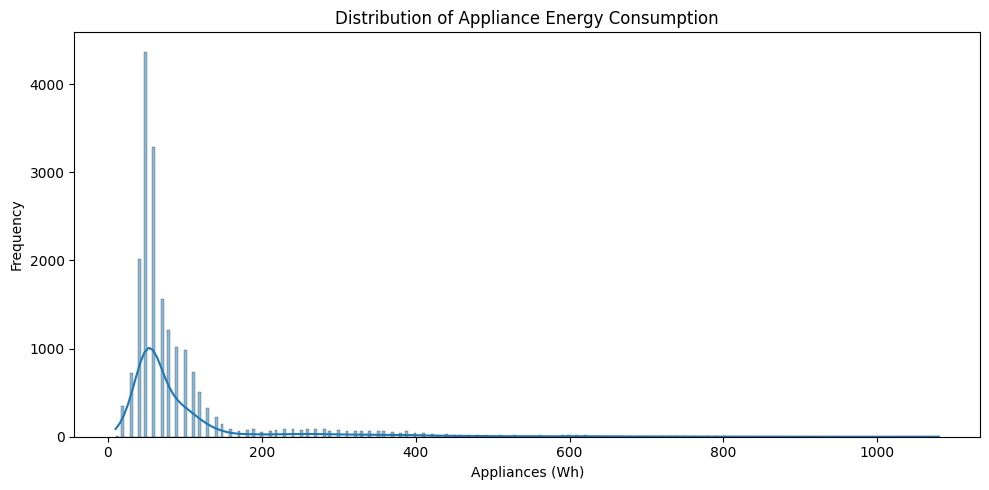

In [37]:
# Distribution of target variable
plt.figure(figsize=(10, 5))
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliance Energy Consumption')
plt.xlabel('Appliances (Wh)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("appliances_distribution.png")


The distribution is likely right-skewed: many low-energy readings and a few very high ones.

Most values cluster between 50 Wh and 250 Wh, suggesting light to moderate usage is common.

The long tail indicates occasional high consumption, possibly due to appliances like ovens, heaters, or washing machines.

This graph Helps understand normal vs. extreme consumption; may suggest the need for transformation (e.g., log scale) or outlier handling.



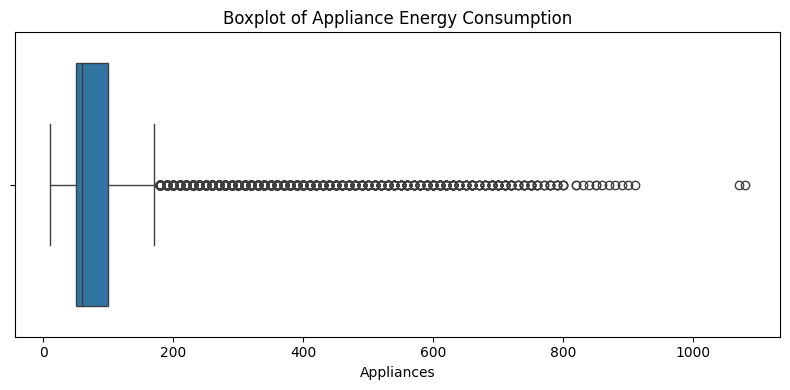

In [40]:
# Boxplot for target
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Appliances'])
plt.title('Boxplot of Appliance Energy Consumption')
plt.tight_layout()
plt.savefig("appliances_boxplot.png")

Median consumption is likely low (consistent with histogram).

There are many outliers, representing extreme appliance usage.

A relatively tight IQR (interquartile range), meaning most values are concentrated in a narrow band

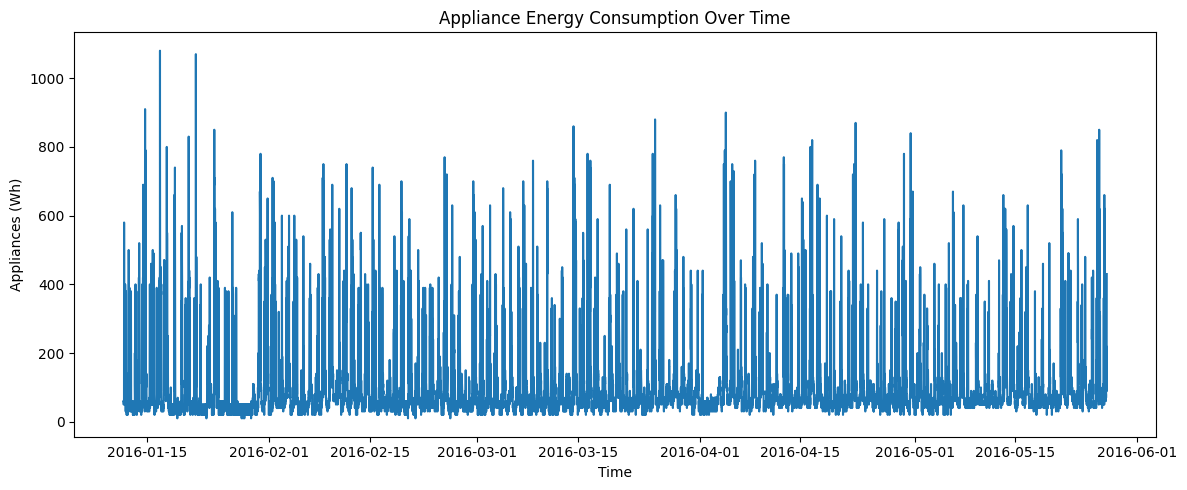

In [43]:
# Time series plot
plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['Appliances'])
plt.title('Appliance Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Appliances (Wh)')
plt.tight_layout()
plt.savefig("appliances_time_series.png")


we can see repeating daily patterns with peaks and troughs.

Peaks may align with morning (6–9 AM) and evening (5–9 PM) activity.

Troughs during the night (midnight–5 AM) suggest little to no usage.

This graph Indicates temporal seasonality — useful if modeling with time-aware techniques like time series models or recurrent neural networks.



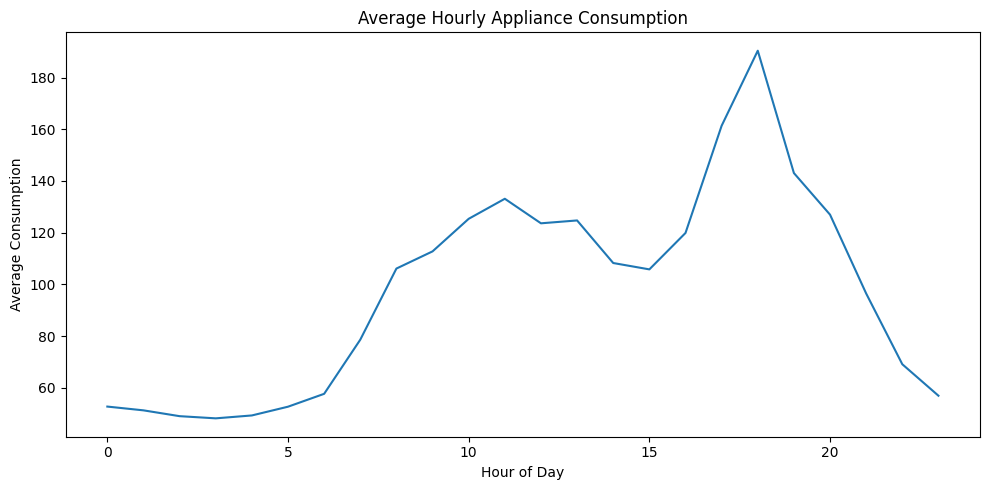

In [46]:
# Average hourly consumption
hourly_avg = df.groupby('hour')['Appliances'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title('Average Hourly Appliance Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Consumption')
plt.tight_layout()
plt.savefig("hourly_appliances.png")


Expect a U-shaped or bimodal curve:

Morning spike (6–9 AM) – wake-up, breakfast

Evening spike (5–9 PM) – cooking, lighting, HVAC

Lowest usage at night (0–5 AM) – people asleep

 This graph is Useful for Identifies key periods of energy use, useful for targeted prediction or load forecasting.

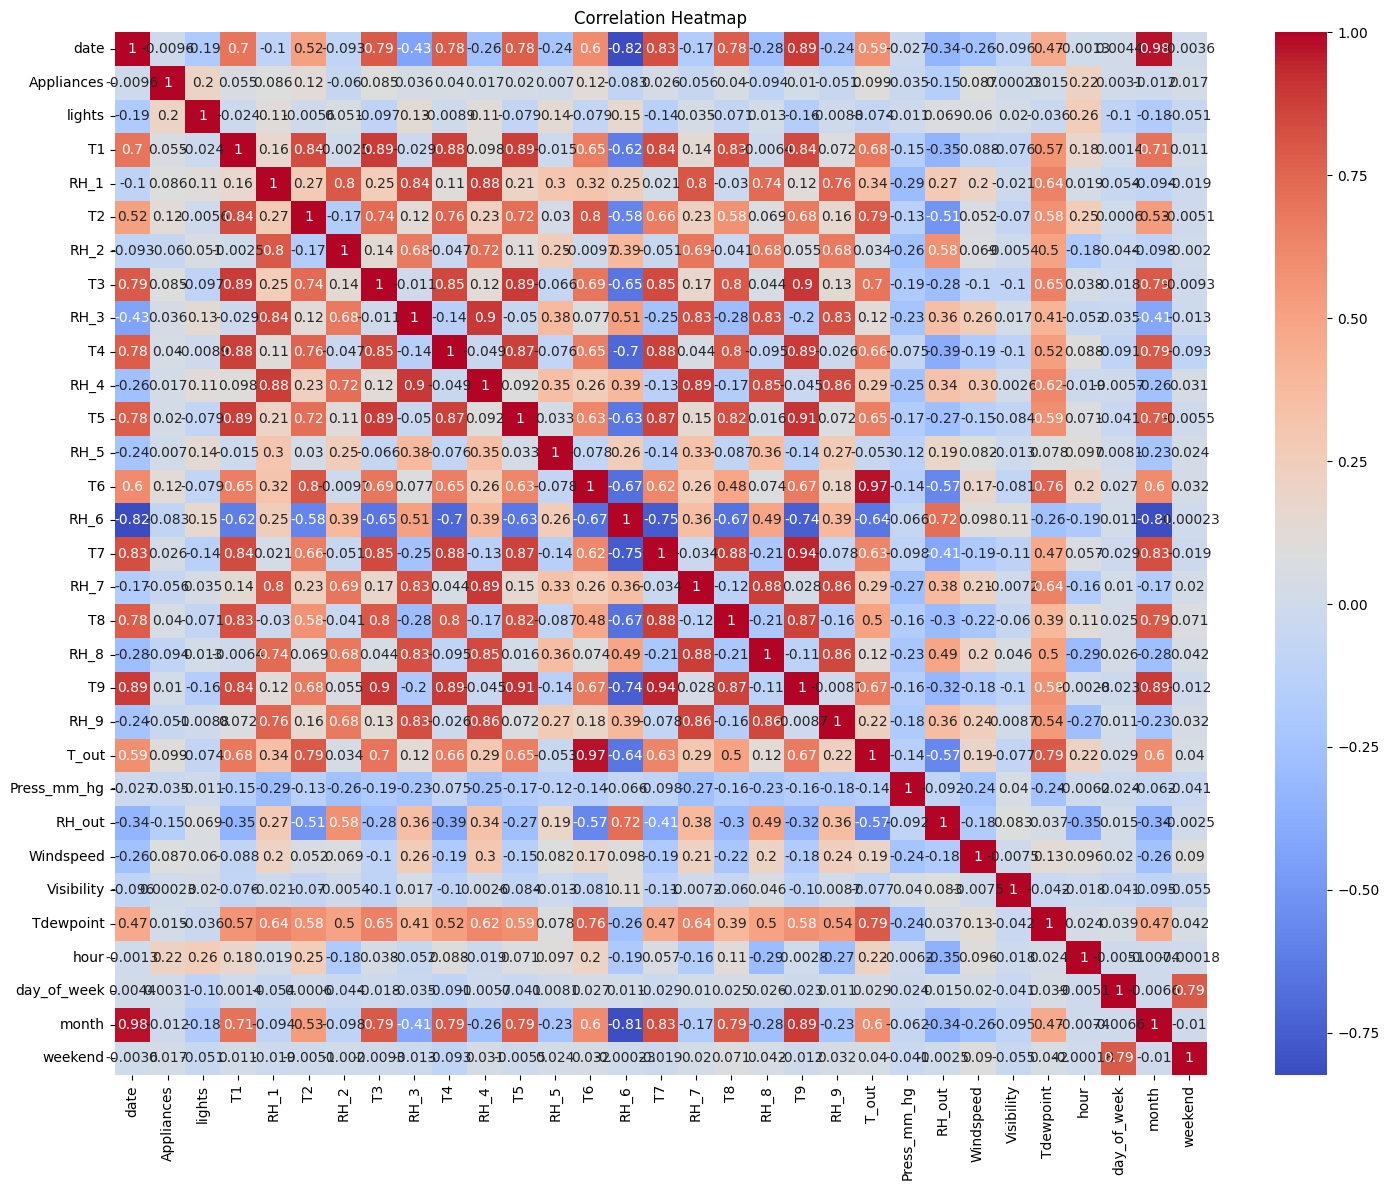

In [49]:
# Correlation heatmap
plt.figure(figsize=(15, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.savefig("correlation_heatmap.png")

Look for features with high correlation to Appliances — e.g., lights, T1, RH_1

Strong inter-feature correlations (e.g., between T1 and T2) suggest potential for feature redundancy or multicollinearity

Weather and outdoor conditions may have weaker direct relationships

Useful for: Guides feature selection and preprocessing (e.g., removing redundant features, PCA).



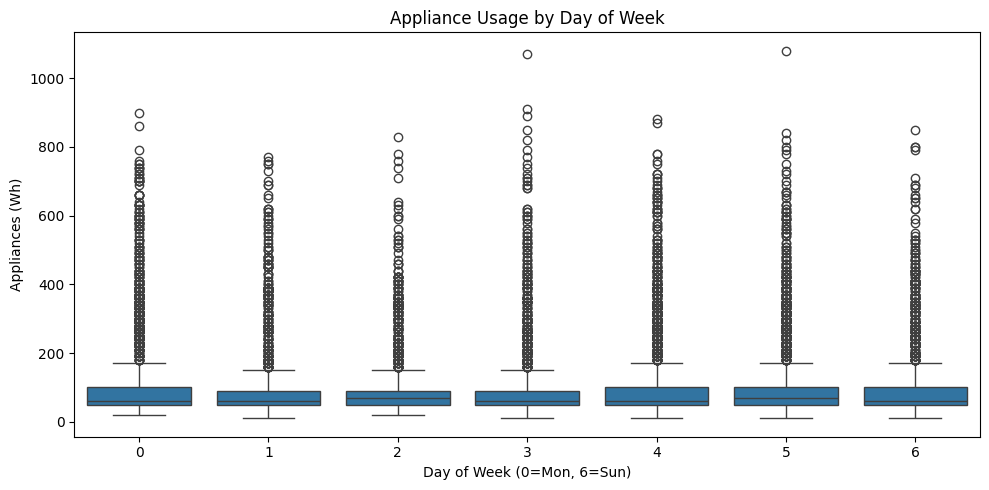

In [52]:
# Boxplot by day of week
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_week', y='Appliances', data=df)
plt.title('Appliance Usage by Day of Week')
plt.xlabel('Day of Week (0=Mon, 6=Sun)')
plt.ylabel('Appliances (Wh)')
plt.tight_layout()
plt.savefig("appliances_by_day.png")

Weekends (5, 6) may show higher median and variance in consumption.

Weekdays often have more regular patterns due to work routines.

Larger spread on certain days could indicate inconsistent behavior (e.g., special events or varying schedules).

Useful for: Highlights weekly patterns that can be used for modeling, especially for calendar-aware systems.

## OUTLIER DETECTION

In [56]:
#Extract Features for Multicollinearity Check
#Drop irrelevent columns,keep only predictor variables
#Here we will drop
#date - Timestamp, not a feature
#Appliances - Target variable

In [58]:
features = [
    'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5',
    'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
    'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
    'Tdewpoint', 'lights'
]
X = df[features]

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate the VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
vif

Features          VIF
0            T1  3606.574751
1          RH_1  1645.915101
2            T2  2504.838317
3          RH_2  2171.390948
4            T3  1239.186497
5          RH_3  1567.984706
6            T4  1027.179735
7          RH_4  1393.996732
8            T5  1187.486443
9          RH_5    45.204828
10           T6    89.039884
11         RH_6    40.372035
12           T7  1614.270433
13         RH_7   519.419750
14           T8   984.860872
15         RH_8   583.043198
16           T9  2594.211117
17         RH_9   640.400487
18        T_out   399.343893
19  Press_mm_hg  2085.454066
20       RH_out  1297.330789
21    Windspeed     5.264485
22   Visibility    12.033022
23    Tdewpoint   132.360130
24       lights     1.579657

In [61]:
# using dbscan
from sklearn.cluster import DBSCAN

In [62]:
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps=eps, min_samples= min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [66]:
df_cluster_input = df[['Appliances']]
clusters = remove_outliers_DBSCAN(df_cluster_input,0.5,10)
clusters.value_counts().sort_values(ascending=False)

cluster
1     4368
0     3282
17    2019
2     1560
9     1205
      ... 
4       11
58      11
59      11
42      10
56      10
Name: count, Length: 63, dtype: int64

In [67]:
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
ind_outlier

Index([  393,   431,   432,   443,   731,   732,   867,   868,  1031,  1079,
       ...
       15799, 15812, 15841, 16647, 17861, 18820, 18830, 19541, 19581, 19582],
      dtype='int64', length=120)

In [70]:
df['cluster']= df_cluster['cluster'].values
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000  ...        733.5    92.0   7.000000   
1  19.79  44.790000  19.000000  ...        733.6    92.0   6.666667   
2  19.79  44.933333  18.926667  ...        733.7    92.0   6.333333   
3  19.79  45.000000  18.890000  ...        733.8    92.0   6.000000   
4  19.79  45.000000  18.890000  ...        733.9    92.0   5.666667   

   Visibility  Tdewpoint  hour  day_of_week  month  weekend  cluster  
0   63.000000        5.3    17            0      1        0        0  
1   59.166667        5.2    17            0      1        0        0  
2   55.333333        5.1    17            0      1        0        1  
3   51.500000        5.0    17            0      1        0        1  
4   47.666667        4.9    17            0      1        0        0  

[5 rows x 32 columns]

In [72]:
len(ind_outlier)
unique_clusters =df_cluster['cluster'].unique
unique_clusters

<bound method Series.unique of 0         0
1         0
2         1
3         1
4         0
         ..
19730     7
19731     8
19732    41
19733    38
19734     5
Name: cluster, Length: 19735, dtype: int64>

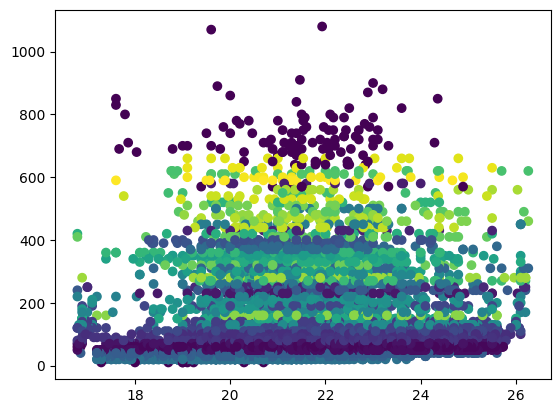

In [74]:
plt.scatter(df['T1'], df['Appliances'], c= df['cluster'])

In [75]:
# Use this step to rather get the derived feature "season" encoded into numerical variable 

#encoding the day_of_week column 
weekdays_encoded = pd.get_dummies(df.day_of_week)

#run the below line only once as concat keeps adding more columns everytime it's run
data = pd.get_dummies(df, columns=['day_of_week'])
data

date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:00:00          60      30  19.890000  47.596667   
1     2016-01-11 17:10:00          60      30  19.890000  46.693333   
2     2016-01-11 17:20:00          50      30  19.890000  46.300000   
3     2016-01-11 17:30:00          50      40  19.890000  46.066667   
4     2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                   ...         ...     ...        ...        ...   
19730 2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731 2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732 2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733 2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734 2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...  month  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...      1   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...      1   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...      1   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...      1   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...      1   
...          ...        ...        ...        ...        ...  ...    ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...      5   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...      5   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...      5   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...      5   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...      5   

       weekend  cluster  day_of_week_0  day_of_week_1  day_of_week_2  \
0            0        0           True          False          False   
1            0        0           True          False          False   
2            0        1           True          False          False   
3            0        1           True          False          False   
4            0        0           True          False          False   
...        ...      ...            ...            ...            ...   
19730        0        7          False          False          False   
19731        0        8          False          False          False   
19732        0       41          False          False          False   
19733        0       38          False          False          False   
19734        0        5          False          False          False   

       day_of_week_3  day_of_week_4  day_of_week_5  day_of_week_6  
0              False          False          False          False  
1              False          False          False          False  
2              False          False          False          False  
3              False          False          False          False  
4              False          False          False          False  
...              ...            ...            ...            ...  
19730          False           True          False          False  
19731          False           True          False          False  
19732          False           True          False          False  
19733          False           True          False          False  
19734          False           True          False          False  

[19735 rows x 38 columns]

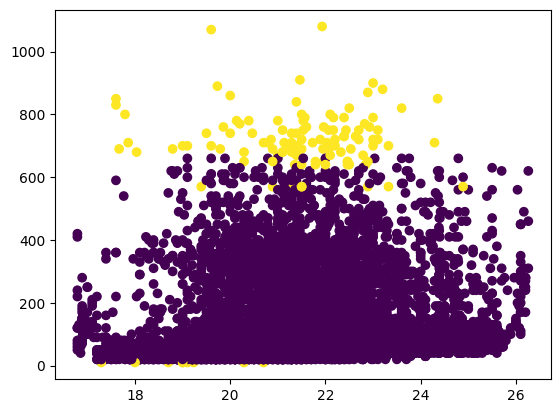

In [78]:
data['outlier_flag'] = data['cluster']==-1
data['outlier_flag'] = data['outlier_flag'].astype(int)
data.head()

#plotting the outliers 
plt.scatter(data['T1'], data['Appliances'], c= data['outlier_flag'])

In [79]:
data_outliers_removed = data[data['outlier_flag'] == 0]
data_outliers = data[data['outlier_flag'] == 1]
data_outliers_removed.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...  weekend  cluster  day_of_week_0  \
0  19.79  44.730000  19.000000  ...        0        0           True   
1  19.79  44.790000  19.000000  ...        0        0           True   
2  19.79  44.933333  18.926667  ...        0        1           True   
3  19.79  45.000000  18.890000  ...        0        1           True   
4  19.79  45.000000  18.890000  ...        0        0           True   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0          False          False          False          False          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   day_of_week_6  outlier_flag  
0          False             0  
1          False             0  
2          False             0  
3          False             0  
4          False             0  

[5 rows x 39 columns]

In [82]:
#Outlier detection using IQR
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
     

df_outlier_removed=remove_outlier_IQR(df_cluster_input.Appliances)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=data.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df_cluster_input.drop([ind_diff[i]])
    df=df_final
 

Text(0, 0.5, 'Price ($)')

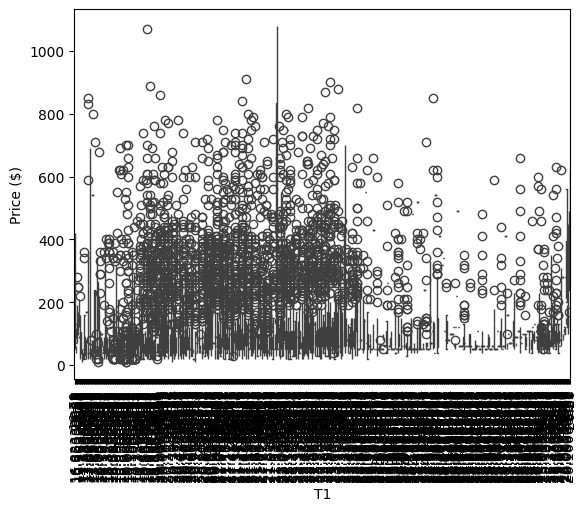

In [83]:
   
sns.boxplot(y='Appliances', x='T1',data=data)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')

In [84]:
df_outlier_removed

Appliances
0              60
1              60
2              50
3              50
4              60
...           ...
19727         120
19728         110
19729          90
19730         100
19731          90

[17597 rows x 1 columns]

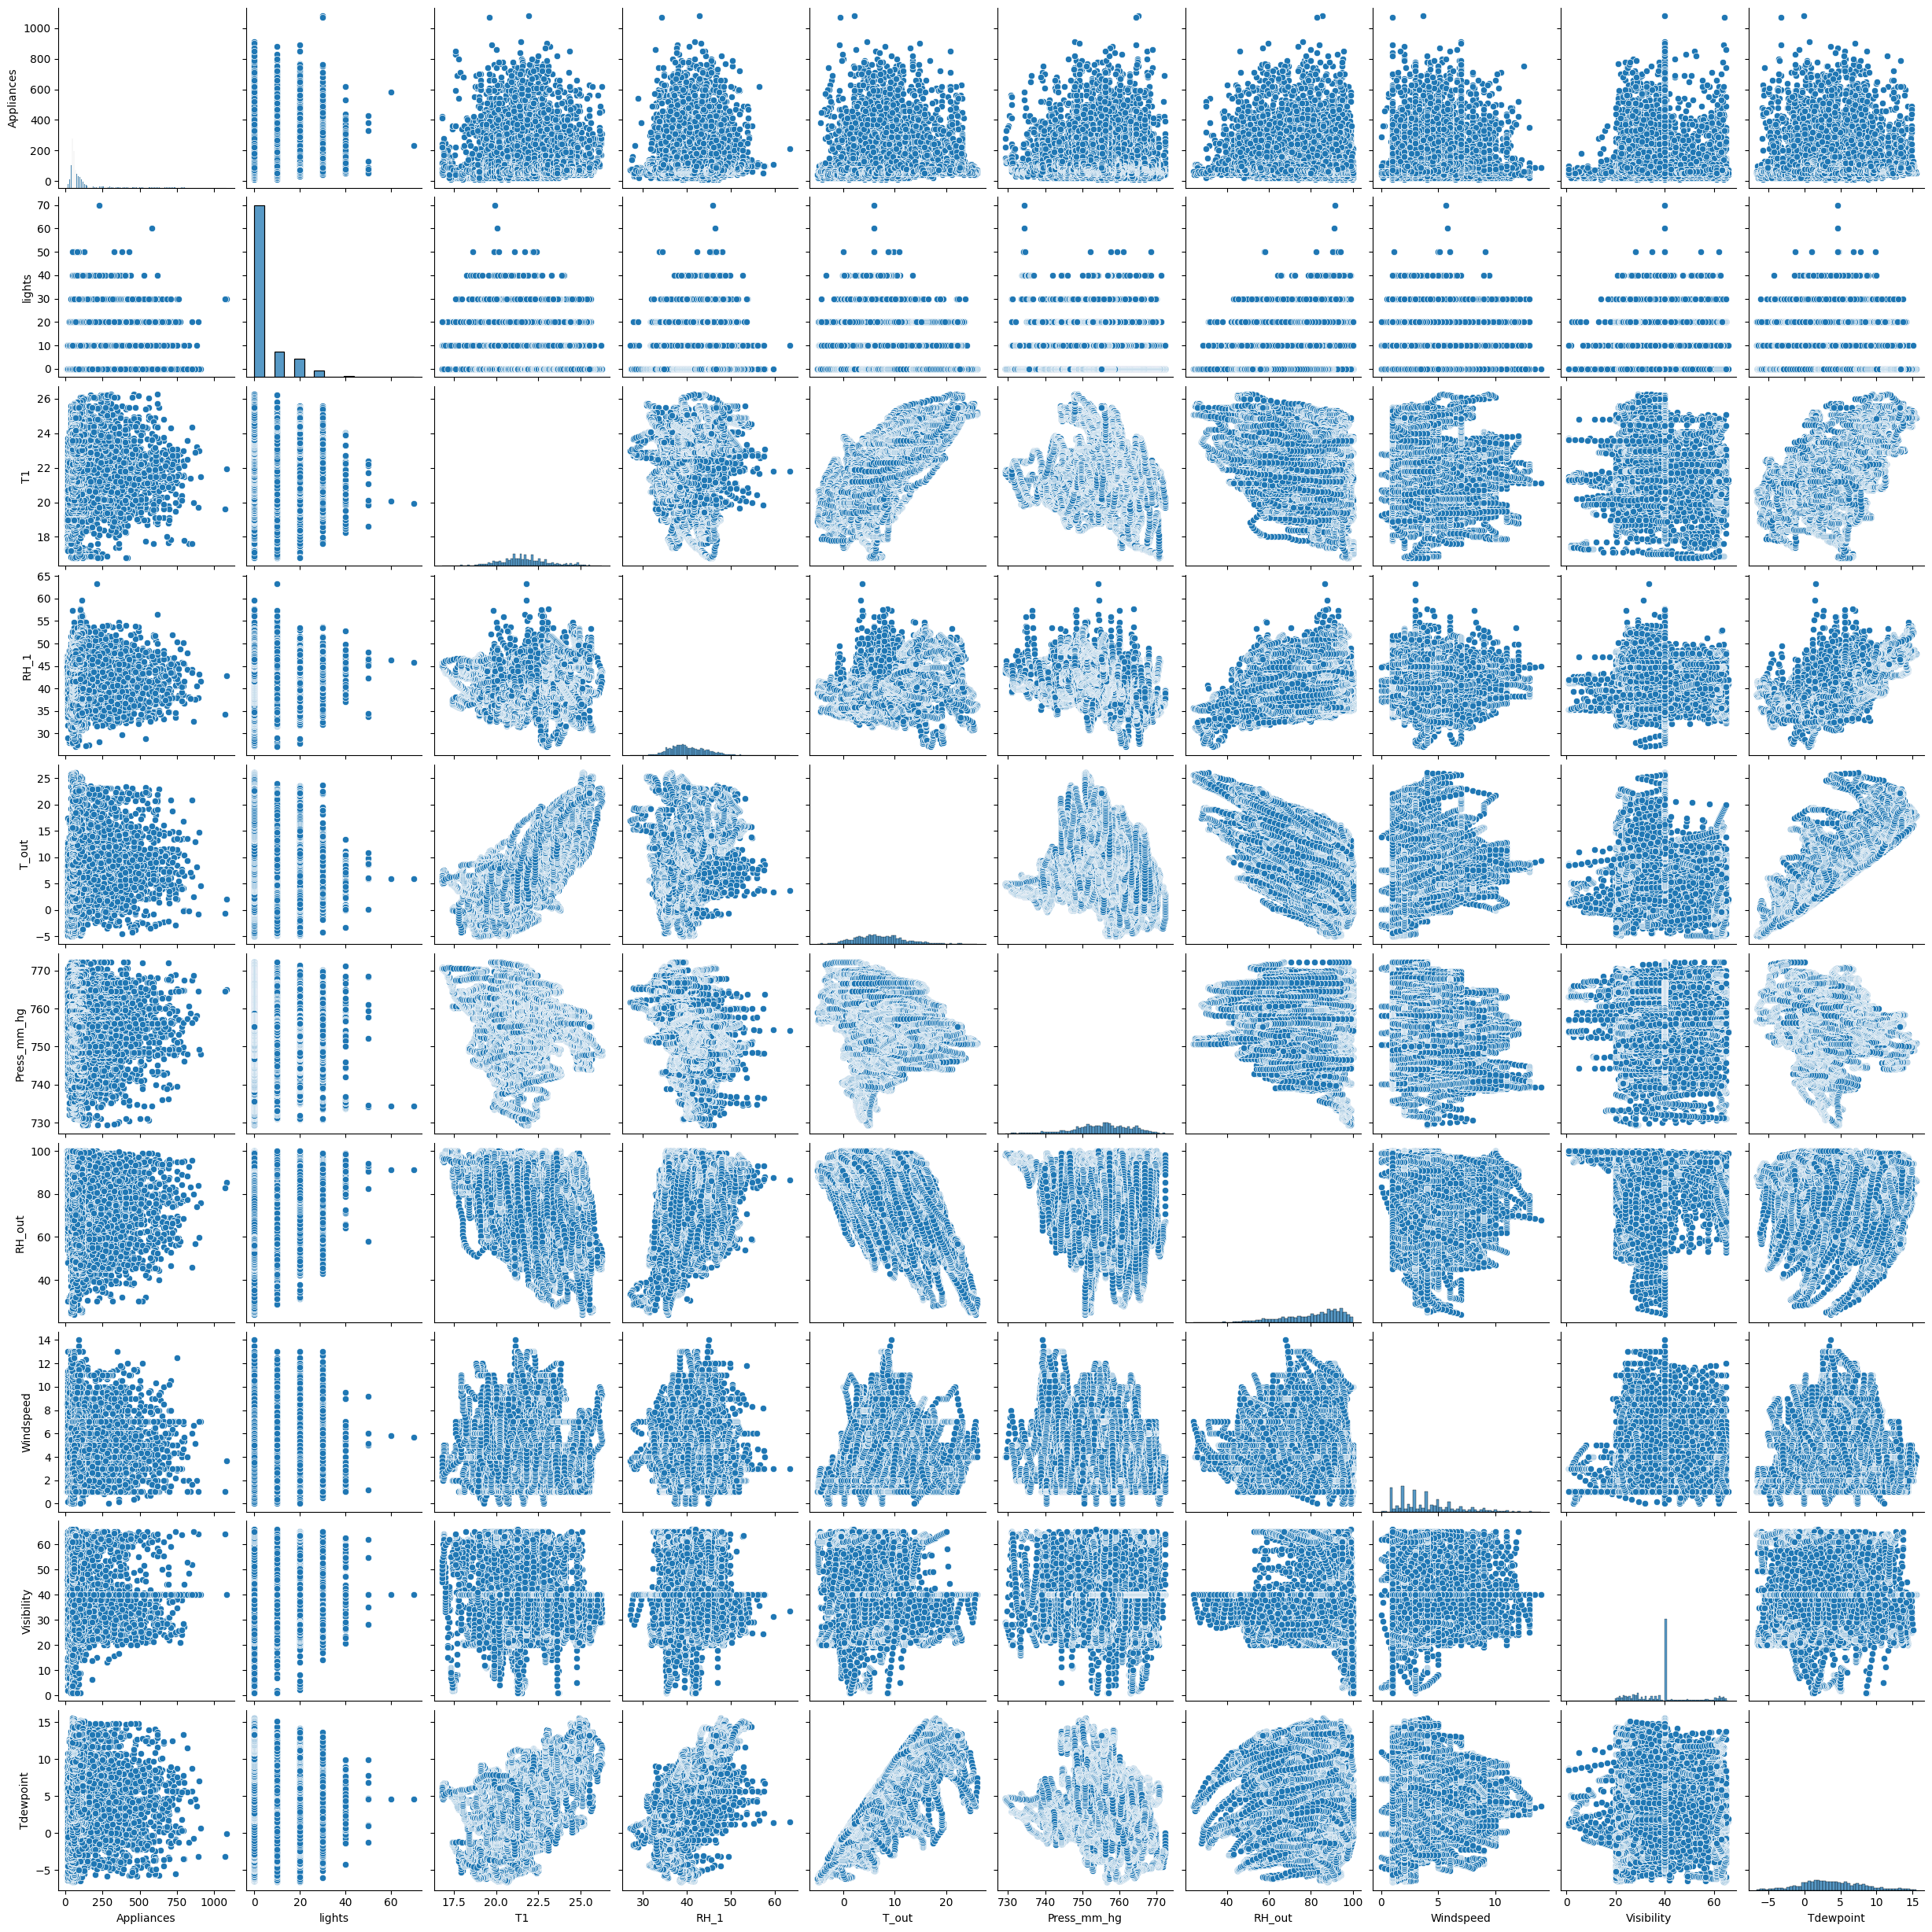

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'hour', 'month', 'weekend', 'cluster',
       'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'outlier_flag'],
      dtype='object')

In [85]:
data_1 = data[['Appliances','lights','T1','RH_1','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint']]
sns.pairplot(data_1, kind='scatter')
plt.show()
data.columns

In [90]:
X = data.drop(columns=['Appliances','date','cluster','outlier_flag'],axis=1)
y = data['Appliances']


## TEST-TRAIN- SPLIT

In [93]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### FEATURE SCALING

In [96]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL TRAINING AND EVALUATION

#### 1.XGBOOST REGRESSOR

In [100]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict
xgb_preds = xgb.predict(X_test)

# Evaluation
def evaluate_model(y_true, y_pred):
    print("XGBoost Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, xgb_preds)


XGBoost Evaluation:
MAE : 39.56
RMSE: 75.81
R²  : 0.4257


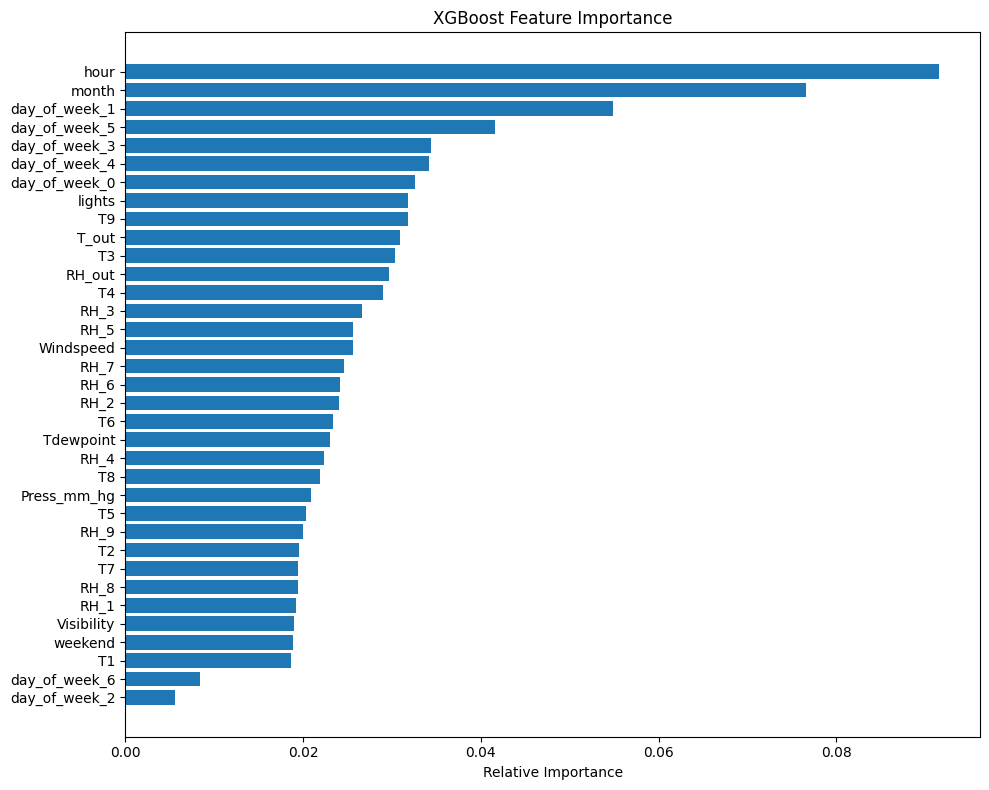

In [102]:
# Plot XGBoost Feature Importance
import matplotlib.pyplot as plt
importances = xgb.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_idx = importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('XGBoost Feature Importance')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()



#### Hyperparameter Tuning (Grid Search)

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.7, 0.9],
    'colsample_bytree': [0.7, 0.9]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_
best_preds = best_xgb.predict(X_test)

evaluate_model(y_test, best_preds)
print("Best Params:", grid_search.best_params_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
XGBoost Evaluation:
MAE : 35.03
RMSE: 70.03
R²  : 0.5099
Best Params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}


#### Plot Actual vs Predicted Values (XGBoost)

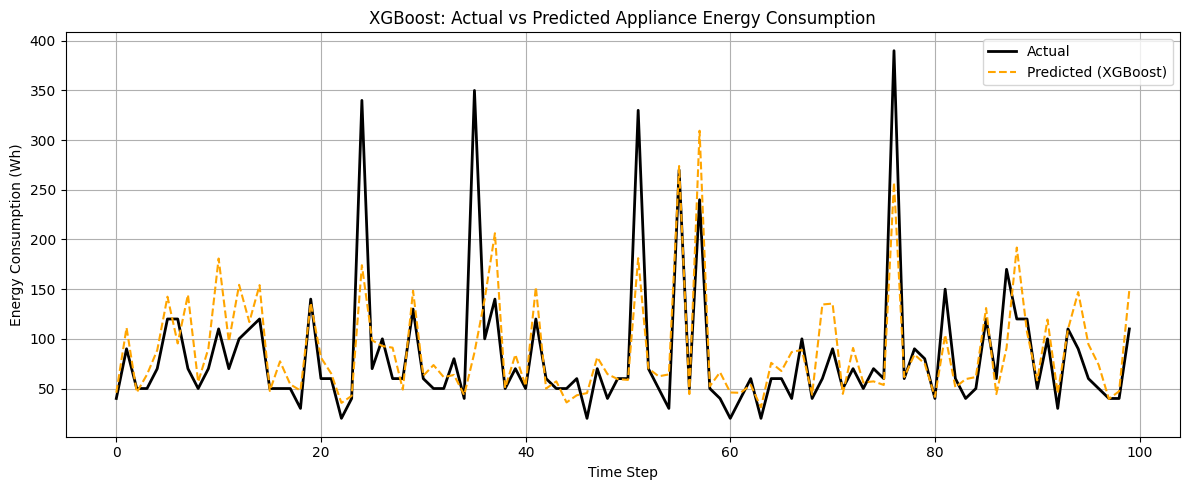

In [108]:

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2, color='black')
plt.plot(best_preds[:100], label='Predicted (XGBoost)', linestyle='--', color='orange')
plt.title('XGBoost: Actual vs Predicted Appliance Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Excellent at capturing non-linear relationships and abrupt changes.

Observation:

Closely follows actual consumption, including spikes and drops.

Strong performance on both trend and variability.

#### 2.Linnear Regression

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
lr_preds = lr.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    print("Linear Regression Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, lr_preds)


Linear Regression Evaluation:
MAE : 52.64
RMSE: 90.80
R²  : 0.1761


####  Linear Regression:Plot Actual vs Predicted

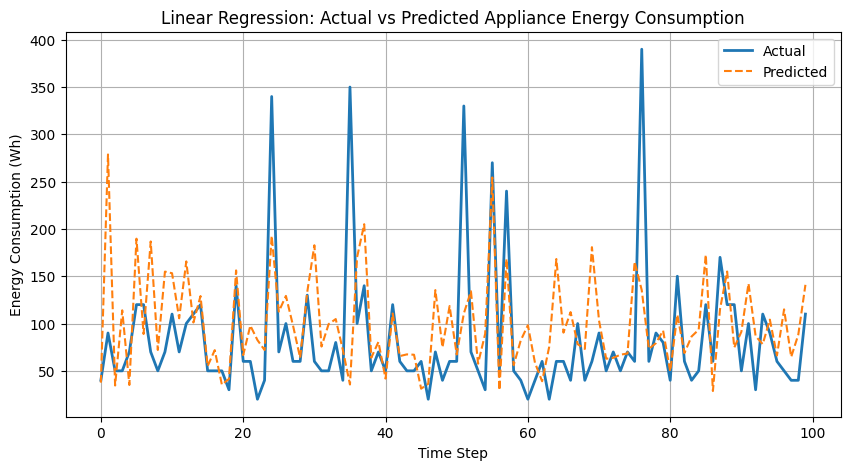

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(lr_preds[:100], label='Predicted', linestyle='--')
plt.title('Linear Regression: Actual vs Predicted Appliance Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()


Produces a smooth line that often underestimates peaks and fails to capture non-linear patterns.

Observation:
Lags during rapid changes in consumption.

Good on overall trend, but weak on sudden spikes/dips.

#### 3.Ridge Regression

In [119]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
ridge = Ridge(alpha=1.0)  # You can tune alpha
ridge.fit(X_train, y_train)

# Make predictions
ridge_preds = ridge.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    print("Ridge Regression Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, ridge_preds)


Ridge Regression Evaluation:
MAE : 52.64
RMSE: 90.80
R²  : 0.1761


#### Tune the alpha Parameter

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_ridge = grid_search.best_estimator_
best_preds = best_ridge.predict(X_test)

evaluate_model(y_test, best_preds)
print("Best alpha:", grid_search.best_params_['alpha'])


Ridge Regression Evaluation:
MAE : 52.58
RMSE: 90.79
R²  : 0.1763
Best alpha: 100.0


#### Ridge Regression:Plot Actual vs Predicted

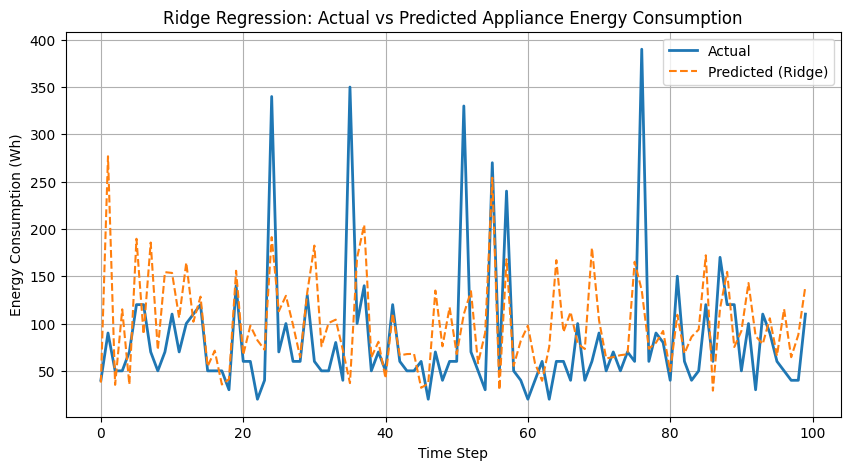

In [125]:

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(best_preds[:100], label='Predicted (Ridge)', linestyle='--')
plt.title('Ridge Regression: Actual vs Predicted Appliance Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()


Similar to linear regression but with better regularization to avoid overfitting.

Observation:

Slightly improved peak handling, but still not responsive to short-term fluctuations.

#### 4.Lasso Regression

In [129]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Initialize and train the model
lasso = Lasso(alpha=0.1)  # You can tune alpha
lasso.fit(X_train, y_train)

# Make predictions
lasso_preds = lasso.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    print("Lasso Regression Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, lasso_preds)


Lasso Regression Evaluation:
MAE : 52.55
RMSE: 90.80
R²  : 0.1761


#### Tune the alpha Parameter

In [132]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso = Lasso(max_iter=10000)  # Increase max_iter to ensure convergence
grid_search = GridSearchCV(lasso, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
best_preds = best_lasso.predict(X_test)

evaluate_model(y_test, best_preds)
print("Best alpha:", grid_search.best_params_['alpha'])


Lasso Regression Evaluation:
MAE : 52.63
RMSE: 90.80
R²  : 0.1761
Best alpha: 0.01


#### Lasso Regression: plot Actual vs Predicted

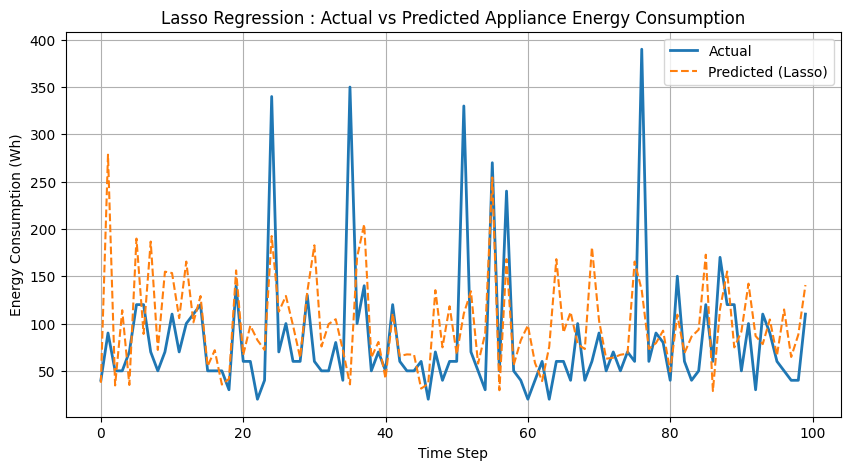

In [135]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(best_preds[:100], label='Predicted (Lasso)', linestyle='--')
plt.title('Lasso Regression : Actual vs Predicted Appliance Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()

 Applies feature selection by shrinking coefficients to zero.

Observation:
Can miss subtle interactions.

May predict even flatter curves if some key features are excluded.

In [138]:
# Check which features Lasso kept
non_zero_features = X_train.columns[(best_lasso.coef_ != 0)]
print("Selected Features:", list(non_zero_features))


Selected Features: ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'hour', 'month', 'weekend', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5']


### 5.NEURAL NETWORK

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 12502.8174 - val_loss: 10046.5127
Epoch 2/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11802.5850 - val_loss: 9910.7812
Epoch 3/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10235.7998 - val_loss: 9784.6826
Epoch 4/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10450.0547 - val_loss: 9676.2197
Epoch 5/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9982.0254 - val_loss: 9414.7725
Epoch 6/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9548.8789 - val_loss: 10132.7891
Epoch 7/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10223.1621 - val_loss: 9411.8662
Epoch 8/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9485.7002 - val_loss: 9522.3105
Epoch 9/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10006.5977 - val_loss: 9284.0293
Epoch 10/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9934.8135 - val_loss: 9304.3018
Epoch 11/50
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10232.6328

In [143]:
# EVALUATE THE MODEL

# Predict
nn_preds = model.predict(X_test).flatten()

# Evaluate
def evaluate_model(y_true, y_pred):
    print("Neural Network Evaluation:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, nn_preds)


124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step   
Neural Network Evaluation:
MAE : 47.81
RMSE: 88.64
R²  : 0.2149


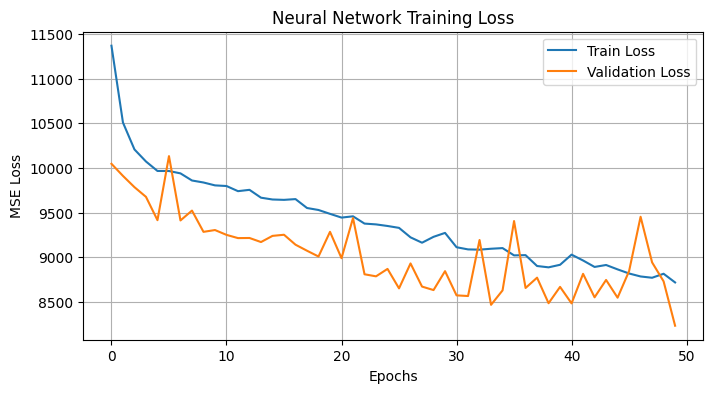

In [145]:
# Plot Training History


plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


#### Neural Network: actual vs predicted

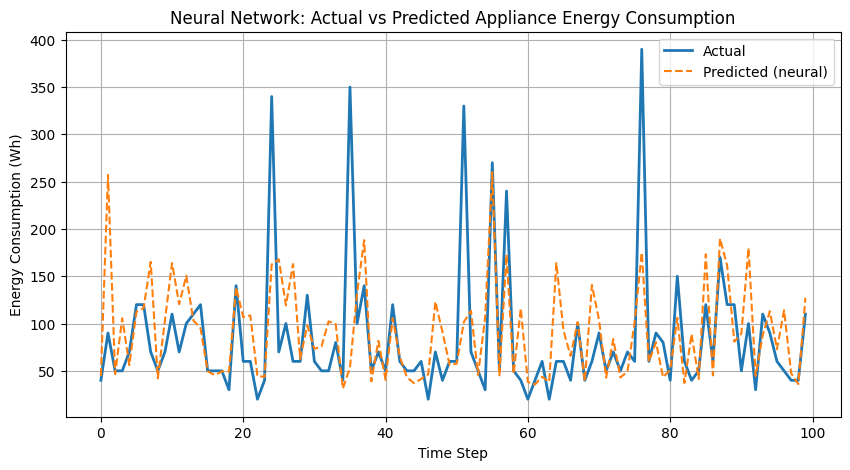

In [148]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(nn_preds[:100], label='Predicted (neural)', linestyle='--')
plt.title('Neural Network: Actual vs Predicted Appliance Energy Consumption')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.show()

Captures non-linear patterns well with enough training and the right architecture.

Observation:
Closely follows the trend but may overestimate or underestimate sharp transitions.

Can improve with more epochs or deeper networks.

#### Combined Line Plot: Actual vs Predicted 

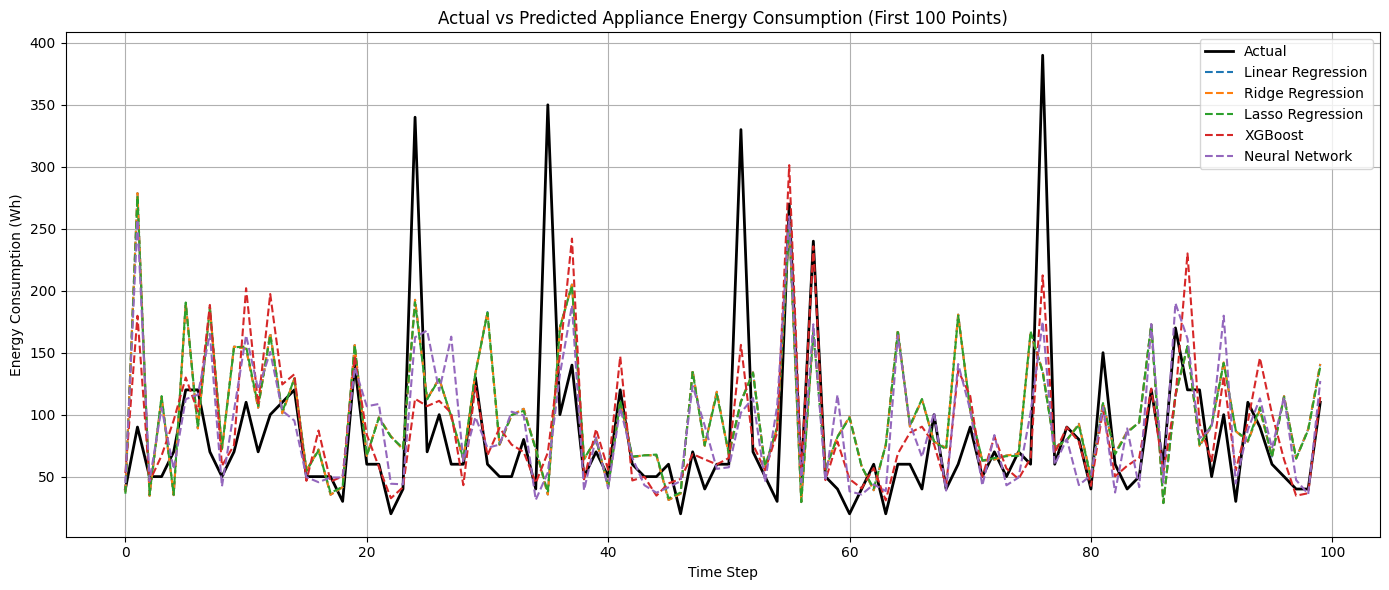

In [152]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.values[:100], label='Actual', linewidth=2, color='black')

plt.plot(lr_preds[:100], label='Linear Regression', linestyle='--')
plt.plot(ridge_preds[:100], label='Ridge Regression', linestyle='--')
plt.plot(lasso_preds[:100], label='Lasso Regression', linestyle='--')
plt.plot(xgb_preds[:100], label='XGBoost', linestyle='--')
plt.plot(nn_preds[:100], label='Neural Network', linestyle='--')

plt.title('Actual vs Predicted Appliance Energy Consumption (First 100 Points)')
plt.xlabel('Time Step')
plt.ylabel('Energy Consumption (Wh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### MODEL EVALUATION

In [155]:

# Define a helper to compute metrics
def get_metrics(name, y_true, y_pred):
    return {
        'Model': name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred)
    }

# Collect metrics from all models
results = [
    get_metrics("Linear Regression", y_test, lr_preds),
    get_metrics("Ridge Regression", y_test, ridge_preds),
    get_metrics("Lasso Regression", y_test, lasso_preds),
    get_metrics("XGBoost", y_test, xgb_preds),
    get_metrics("Neural Network", y_test, nn_preds)
]

# Create a DataFrame
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by='RMSE')  # Optional: sort by best performance

print(comparison_df)


               Model        MAE       RMSE        R²
3            XGBoost  39.555199  75.812060  0.425660
4     Neural Network  47.809715  88.635983  0.214923
2   Lasso Regression  52.553028  90.799505  0.176129
1   Ridge Regression  52.640690  90.802151  0.176081
0  Linear Regression  52.641318  90.802314  0.176078


Best model will have the lowest RMSE and MAE, and the highest R². so here  XGBoost is the best model.

#### Bar Chart of Model Performance (RMSE)

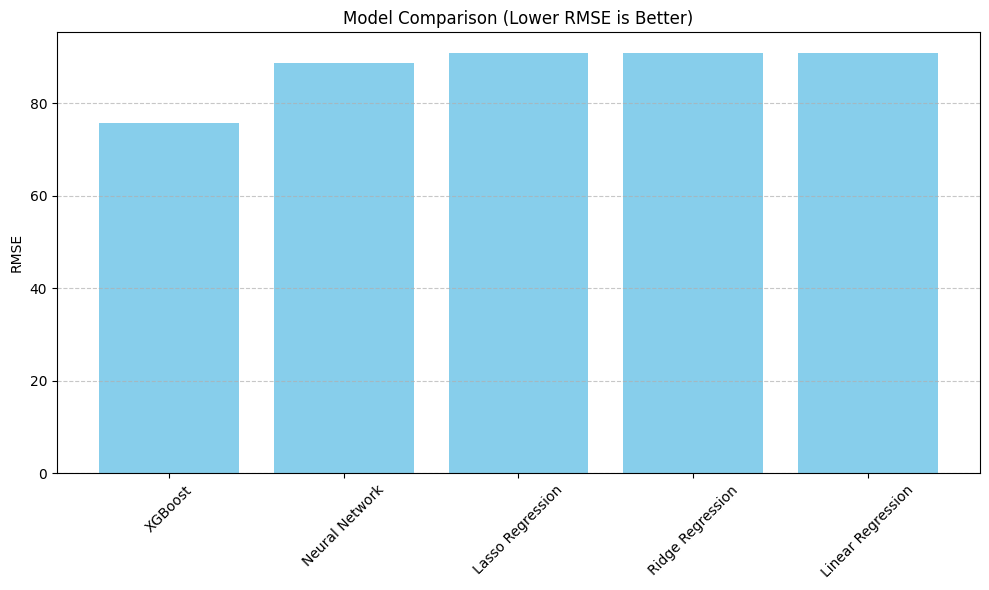

In [159]:
# Plot RMSE for each model
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color='skyblue')
plt.title('Model Comparison (Lower RMSE is Better)')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


FROM this we can see that neural network has the high rmse value and XGBoost has the low rmse value. since the lower rmse value is the best model here XGBoost is the best model

## CONCLUSION

This project successfully explored and evaluated multiple machine learning models to predict household appliance energy consumption using environmental and time-based features.

We implemented and compared the following models:Linear Regression,Ridge Regression,Lasso Regression,XGBoost Regressor,Neural Network (Multilayer Perceptron). Each model was evaluated based on MAE, RMSE, and R² metrics to determine its predictive performance.

XGBoost consistently delivered the best performance, with the lowest error metrics and highest R² score. It effectively captured complex, nonlinear relationships and temporal fluctuations in energy usage.

The Neural Network also showed strong performance and tracked consumption trends well, though it requires more tuning and computational resources.

Linear, Ridge, and Lasso regressions provided decent baseline results but struggled to model nonlinearities and abrupt changes in consumption patterns.

Feature importance analysis revealed that variables like outside temperature (T_out), indoor humidity (RH_1), and indoor temperature (T1) were the most influential factors affecting energy consumption.

### Recommendations
Deploy XGBoost as the preferred model for production or forecasting purposes due to its superior accuracy and interpretability.

For improved real-world deployment, consider building a lightweight web dashboard (e.g., using Streamlit) for real-time predictions.

Periodically retrain the model with new data to account for seasonal and behavioral changes in energy usage.

### Future Work
Incorporate time series models (e.g., LSTM, Prophet) to better capture temporal dependencies.

Explore model ensembling to combine the strengths of XGBoost and neural networks.

Use smart meter data at a higher granularity (e.g., per minute) to improve short-term forecasting.